In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statwrap
from statwrap.fpp import histogram

In [11]:
from matplotlib.transforms import blended_transform_factory

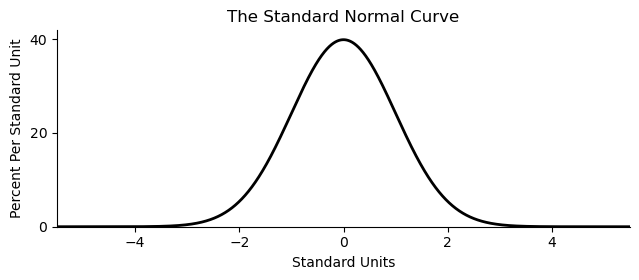

In [138]:
pts = 100_000
x = np.linspace(-5.5,5.5, pts)
y = stats.norm.pdf(x)


fig, ax = plt.subplots(figsize = (6.5, 2.9))
ax.plot(x, 100*y, lw = 2, color = 'black')

ax.set_xlim(-5.5, 5.5)
ylims = ax.get_ylim()
ax.set_ylim(0, ylims[1])
ax.set_yticks([0,20,40])

ax.set_title("The Standard Normal Curve")
ax.set_ylabel("Percent Per Standard Unit")
ax.set_xlabel("Standard Units")

for s in 'right', 'top':
    ax.spines[s].set_visible(False)
    
plt.tight_layout()
plt.savefig("../book/images/normalcurve.svg", transparent = True)
plt.savefig("normalcurve.pdf") #, transparent = True)

In [3]:
df = pd.read_csv("../Data/ATUS/ATUS_summary_sample.csv")

In [4]:
df.shape

(4000, 457)

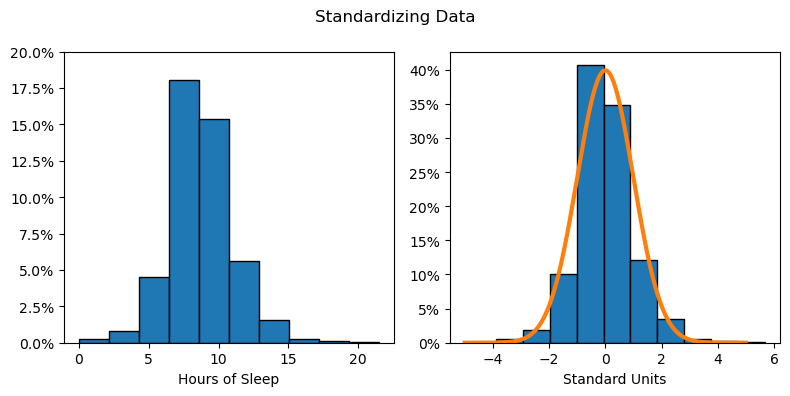

In [5]:
fig, axs = plt.subplots(1, 2, figsize = (8,4))

#df.t010101.hist(ax = ax)

ax = axs[0]
histogram(df.t010101/60, ax=ax, show = False, precision = 1)
ax.set_xlabel("Hours of Sleep")

ax = axs[1]
sleep_sd = df.t010101.std(ddof = 0)
standardized = (df.t010101 - df.t010101.mean())/sleep_sd
histogram(standardized, ax=ax,
         show = False)
ax.set_xlabel('Standard Units')
ax.plot(x, y, lw = 3, ls = 'solid')


plt.suptitle("Standardizing Data")
plt.tight_layout()
plt.savefig("../book/images/sleep_standardized_histogram.svg", transparent = False)

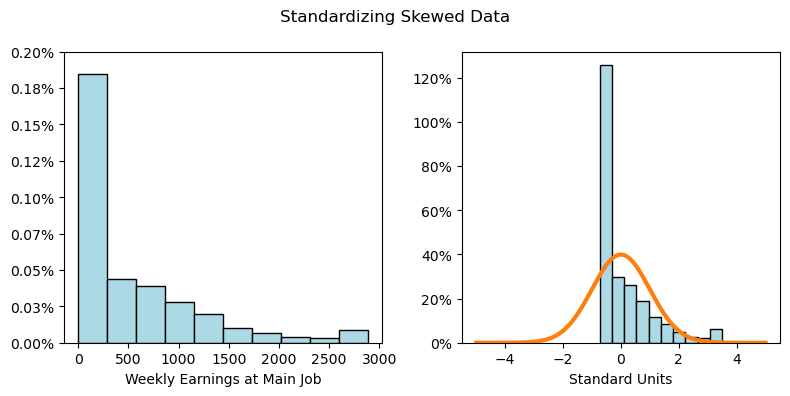

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (8,4))

#df.t010101.hist(ax = ax)

ax = axs[0]
histogram(df.TRERNWA / 100 , ax=ax, show = False, precision = 2, color = 'lightblue')
ax.set_xlabel("Weekly Earnings at Main Job")

ax = axs[1]
sleep_sd = df.TRERNWA.std(ddof = 0)
standardized = (df.TRERNWA - df.TRERNWA.mean())/sleep_sd
histogram(standardized, ax=ax,
         show = False,
         color = 'lightblue')
ax.set_xlabel('Standard Units')
ax.plot(x, y, lw = 3, ls = 'solid', color = 'C1')


plt.suptitle("Standardizing Skewed Data")
plt.tight_layout()
plt.savefig("../book/images/earnings_standardized_histogram.svg", transparent = False)

In [7]:
# random data

d = np.random.lognormal(size = 10**5)

(array([1., 0., 0., 2., 6., 6., 3., 1., 0., 1.]),
 array([-4.47347378, -3.60716604, -2.7408583 , -1.87455056, -1.00824282,
        -0.14193507,  0.72437267,  1.59068041,  2.45698815,  3.32329589,
         4.18960363]),
 <BarContainer object of 10 artists>)

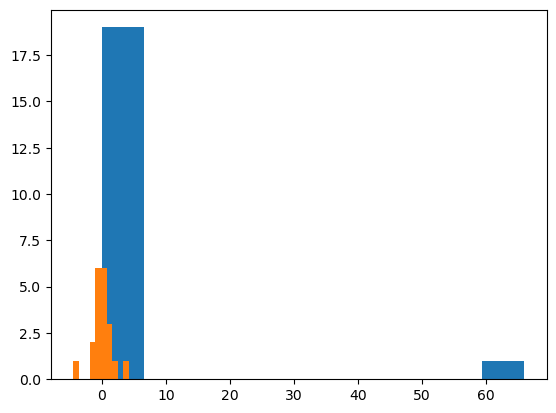

In [16]:
dd = np.quantile(d, np.linspace(0,1,20))

logged = np.log(dd)

plt.hist(dd)

plt.hist(logged, color = 'C1')

In [21]:
ee = 10*dd//1

np.mean(ee), np.std(ee)

(45.3, 141.3128090443326)

In [22]:
ee

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        12.,  13.,  16.,  18.,  22.,  27.,  34.,  50., 659.])

In [23]:
np.log2(0)

/tmp/ipykernel_26555/2251961259.py:1: RuntimeWarning: divide by zero encountered in log2
  np.log2(0)


-inf

In [24]:
logged

array([-4.47347378, -1.62369161, -1.25239403, -1.0058678 , -0.80815202,
       -0.63688615, -0.48169333, -0.33934489, -0.20375865, -0.07087121,
        0.06242371,  0.19425322,  0.33276373,  0.47533304,  0.62490847,
        0.79588202,  0.99641399,  1.24083073,  1.61323458,  4.18960363])

In [30]:
a = np.random.normal(size = 1000000)
np.quantile(a, np.linspace(0,1,11))//1

array([-5., -2., -1., -1., -1., -1.,  0.,  0.,  0.,  1.,  4.])

In [45]:
d =  -2, -2, -2, 0, 0, 0, 0, 0, 1, 1, 4

In [46]:
def summarize(data):
    
    sd = np.std(data, ddof = 0)
    avg = np.mean(data)
    
    within1 = [x for x in data if np.abs(avg-x) <= sd]
    within2 = [x for x in data if np.abs(avg-x) <= 2*sd]
    
    return len(within1)/len(data), len(within2)/len(data)

In [47]:
summarize(d)

(0.6363636363636364, 0.9090909090909091)

In [58]:
len(d)

11

In [50]:
np.std(d)**2

2.7272727272727275

In [53]:
ll = [2**i for i in d]

$$\log_2$$

In [54]:
summarize(ll)

(0.9090909090909091, 0.9090909090909091)

In [55]:
np.mean(ll)

2.340909090909091

In [56]:
np.std(ll)

4.357950841529776

In [57]:
ll

[0.25, 0.25, 0.25, 1, 1, 1, 1, 1, 2, 2, 16]

# Z table graphs

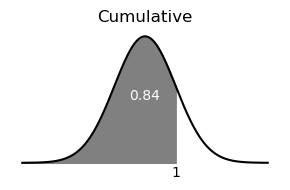

In [68]:
# cumulative distribution function

x = np.linspace(-4,4, 100_000)
y = stats.norm.pdf(x) # standard normal

fig, ax = plt.subplots(figsize = (3,2))
ax.plot(x,y, color = 'black')
ax.axis('off')
x_thru_1 = x[x<1]
ax.fill_between(x_thru_1, y[0:len(x_thru_1)],
                color = 'gray')

ax.text(1, -0.01,
        s = '1',
        ha = 'center',
        va = 'top')

ax.text(0, .2,
        s = "{:.2f}".format(stats.norm.cdf(1)),
        ha = 'center',
        color = 'white')

#plt.title(r"$F(1) = 0.84$", pad = 13)
plt.title("Cumulative")

plt.tight_layout()
plt.savefig("../book/images/cumulative_area_normal.svg", transparent = True)

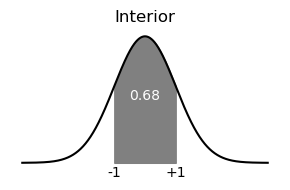

In [69]:
# cumulative distribution function

x = np.linspace(-4,4, 100_000)
y = stats.norm.pdf(x) # standard normal

fig, ax = plt.subplots(figsize = (3,2))
ax.plot(x,y, color = 'black')
ax.axis('off')
x_thru_1 = x[x<1]
x_thru_1 = x_thru_1[x_thru_1>-1]
remainder = len(x) - len(x_thru_1)
ax.fill_between(x_thru_1, y[remainder//2: - (remainder//2)],
                color = 'gray')

ax.text(1, -0.01,
        s = '+1',
        ha = 'center',
        va = 'top')
ax.text(-1, -0.01,
        s = '-1',
        ha = 'center',
        va = 'top')

ax.text(0, .2,
        s = "{:.2f}".format(stats.norm.cdf(1) - stats.norm.cdf(-1)),
        ha = 'center',
        color = 'white')

#plt.title(r"$F(1) = 0.84$", pad = 13)
plt.title("Interior")
#plt.text(0.5, 1, '',
#         transform = ax.transAxes,
#         ha = 'center',
#         va = 'bottom')

plt.tight_layout()
plt.savefig("../book/images/cumulative_area_interior.svg", transparent = True)

# For lectures slides

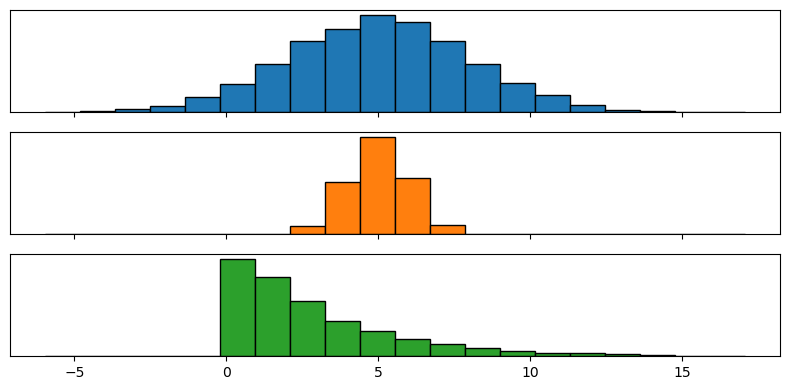

In [109]:
import numpy as np
np.random.seed(1)

fig, axs = plt.subplots(3,1, figsize = (8,4), sharex = True)

ax = axs[0]


n = 10000
data1 = np.random.normal(5,3, size = n)
c, bins, bar = ax.hist(data1, ec = 'black', bins = 20, density = True)


ax = axs[1]
data2 = np.random.normal(5,1, size = n)
ax.hist(data2, ec = 'black', bins = bins, density = True, color = 'C1') 

ax = axs[2]
data3 = np.random.exponential(3, size = n)
ax.hist(data3, ec = 'black', bins = bins, color = 'C2', density = True)


for ax in axs:
    ax.set_yticks([])


plt.tight_layout()
plt.savefig('differentSDhistograms_unlabeled.pdf')
plt.show()

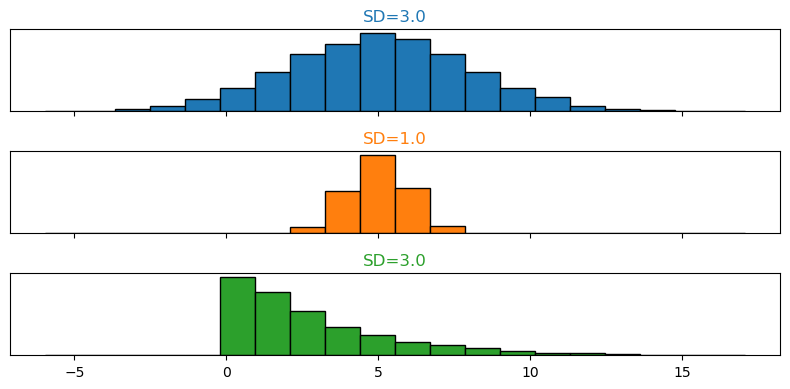

In [110]:
#import numpy as np
#np.random.seed(1)

fig, axs = plt.subplots(3,1, figsize = (8,4), sharex = True)

ax = axs[0]


n = 10000
#data = np.random.normal(5,3, size = n)
c, bins, bar = ax.hist(data1, ec = 'black', bins = 20, density = True)
ax.set_title(f"SD={np.std(data1):.1f}", color = "C0")


ax = axs[1]
#data = np.random.normal(5,1, size = n)
ax.hist(data2, ec = 'black', bins = bins, density = True, color = 'C1') 
ax.set_title(f"SD={np.std(data2):.1f}", color = "C1")

ax = axs[2]
#data = np.random.exponential(3, size = n)
ax.hist(data3, ec = 'black', bins = bins, color = 'C2', density = True)
ax.set_title(f"SD={np.std(data3):.1f}", color = "C2")

for ax in axs:
    ax.set_yticks([])

plt.tight_layout()
plt.savefig('differentSDhistograms_labeled.pdf')
plt.show()

In [116]:
def foo(data):
    
    data = pd.Series(data)
    
    avg = np.mean(data)
    sd = np.std(data, ddof = 0)
    
    above = data[data > avg + sd]
    print(avg, sd, len(above)/len(data))

In [128]:
n = 1000

data = [-10**10]*n + [0]*1 + [10**10]*n

In [129]:
foo(data)

0.0 9997500937.109701 0.49975012493753124


In [131]:
np.std([0,1,-1], ddof = 0)

0.816496580927726

In [132]:
np.std([0,1,1, -1, -1], ddof = 0)

0.8944271909999159

In [139]:
df['hours_sleep'] = df.t010101/60
aa = df[['TUCASEID','hours_sleep', 'TRERNWA']]
aa.to_clipboard(index = False)

# Z-table figure

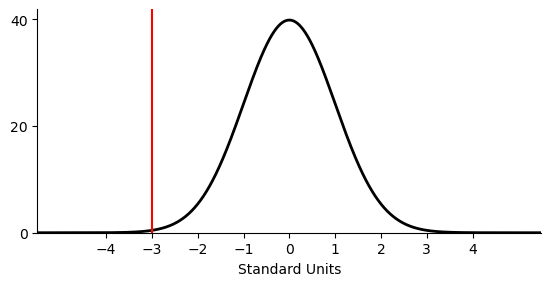

In [20]:
pts = 100_000
x = np.linspace(-5.5,5.5, pts)
y = stats.norm.pdf(x)


fig, ax = plt.subplots(figsize = (6.5, 2.9))
ax.plot(x, 100*y, lw = 2, color = 'black')

ax.set_xlim(-5.5, 5.5)
ylims = ax.get_ylim()
ax.set_ylim(0, ylims[1])
ax.set_yticks([0,20,40])
ax.set_xticks(np.arange(-4,5))

#ax.set_ylabel("Percent Per Standard Unit")
ax.set_xlabel("Standard Units")

for s in 'right', 'top':
    ax.spines[s].set_visible(False)
    
    
transform = blended_transform_factory(ax.transData, fig.transFigure)
#ax.axvline(x = -3, ymin = 0, ymax = 1, transform = transform)    
ax.plot([-3, -3], [0, 1], transform=transform, color="red")



#plt.tight_layout()

In [38]:
for i in range(100):
    if stats.norm.cdf(i) == 1:
        print(i)
        break

9


# Exercise




Students from high schools A and B compete for admission to college U. U admits any student with an SAT score above a threshold. School A has a lower average SAT than School B. Assume SAT scores follow a normal curve for each school. 

\bigskip 


Is it possible that A has a higher admission rate? 

\medskip 

What if the admission rate for School B is over 50\%? 

\medskip
Draw a picture and try to give concrete numbers in an example if applicable. 
    

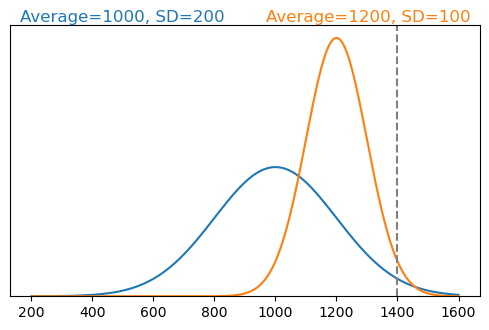

In [78]:
n = 1000
x = np.linspace(200, 1600, n)

low = 1000, 200
high = 1200, 100

y_low = stats.norm.pdf(x, *low)
y_high = stats.norm.pdf(x, *high)


thresh = 1400

fig, ax = plt.subplots(figsize = (5,3.4))

ax.plot(x, y_low, color = 'C0')
ax.plot(x, y_high, color = 'C1')

ax.axvline(thresh, ls = 'dashed', color = 'gray')

ylim = ax.get_ylim()
ax.set_ylim(0, ylim[1])

ax.text(0.021, 1, s = 'Average=1000, SD=200',
        transform = ax.transAxes, va = 'bottom',
        ha = 'left',
       color = 'C0', size = 12)

ax.text(0.98, 1, s = 'Average=1200, SD=100',
        transform = ax.transAxes, va = 'bottom',
        ha = 'right',
       color = 'C1', size = 12)

ax.set_yticks([])

plt.tight_layout()
plt.savefig("../book/images/schoolnormexercise.svg", transparent = True)

In [62]:
thresh += 10
stats.norm.sf(thresh, *low)

0.020182215405704394

In [63]:
stats.norm.sf(thresh, *high)

0.017864420562816542